In [38]:
import numpy as np
import cv2
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
noise=np.random.normal(0.9,0.2, Xtrain.shape)
Xtrain2=cv2.add(Xtrain,noise)
noise=np.random.normal(0.1,0.2, Xtrain.shape)
Xtrain3=cv2.add(Xtrain,noise)
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1
noise=np.random.normal(0.9,0.2, Xtest.shape)
Xtest2=cv2.add(Xtest,noise)
noise=np.random.normal(0.1,0.2, Xtest.shape)
Xtest3=cv2.add(Xtest,noise)

In [39]:
ytrain2=ytrain.copy()
ytrain2[ytrain<=5]=0
ytrain2[ytrain>=5]=1
ytest2=ytest.copy()
ytest2[ytest<=5]=0
ytest2[ytest>=5]=1

In [49]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [41]:
Xtrain.shape,Xtrain2.shape,Xtrain3.shape

((60000, 28, 28), (60000, 28, 28), (60000, 28, 28))

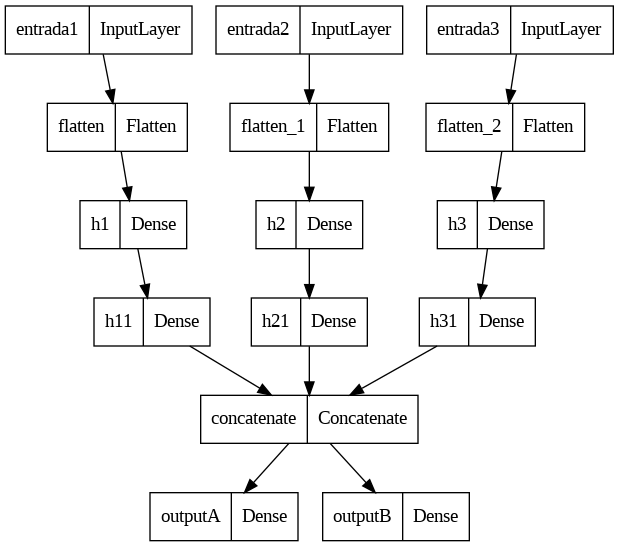

In [42]:
#arquitectura funcional 2
import tensorflow as tf
from tensorflow import keras
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada1')
input_2 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada2')
input_3 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada3')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)
flatten2 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_2)
flatten3 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_3)



h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h1 = tf.keras.layers.Dense(50,activation='tanh',name='h11')(h1)
h2 = tf.keras.layers.Dense(200,activation='tanh',name='h2')(flatten2)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h21')(h2)
h3 = tf.keras.layers.Dense(200,activation='tanh',name='h3')(flatten3)
h3 = tf.keras.layers.Dense(50,activation='tanh',name='h31')(h3)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h1,h2,h3])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(1,activation="sigmoid",name='outputB')(concat)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=[input_l,input_2,input_3],outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

In [43]:
ytrain2,ytrain

(array([1, 0, 0, ..., 0, 0, 1], dtype=uint8),
 array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

In [44]:
model_fun.compile(loss=["sparse_categorical_crossentropy","binary_crossentropy"], #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics="accuracy") #f1, precision, recall, crossentropy

In [45]:
history = model_fun.fit([Xtrain,Xtrain2,Xtrain3], [ytrain,ytrain2] , epochs=10,batch_size=64) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
938/938 [==============================] - 14s 13ms/step - loss: 0.6878 - outputA_loss: 0.4919 - outputB_loss: 0.1958 - outputA_accuracy: 0.8219 - outputB_accuracy: 0.9161
Epoch 2/10
938/938 [==============================] - 12s 13ms/step - loss: 0.5264 - outputA_loss: 0.3699 - outputB_loss: 0.1565 - outputA_accuracy: 0.8648 - outputB_accuracy: 0.9342
Epoch 3/10
938/938 [==============================] - 12s 12ms/step - loss: 0.4777 - outputA_loss: 0.3332 - outputB_loss: 0.1445 - outputA_accuracy: 0.8766 - outputB_accuracy: 0.9391
Epoch 4/10
938/938 [==============================] - 11s 12ms/step - loss: 0.4450 - outputA_loss: 0.3090 - outputB_loss: 0.1360 - outputA_accuracy: 0.8857 - outputB_accuracy: 0.9427
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 0.4151 - outputA_loss: 0.2866 - outputB_loss: 0.1285 - outputA_accuracy: 0.8931 - outputB_accuracy: 0.9456
Epoch 6/10
938/938 [==============================] - 14s 15ms/step - loss: 0.3954 - 

In [48]:
model_fun.evaluate([Xtest,Xtest2,Xtest3],[ytest,ytest2])

313/313 [==============================] - 4s 9ms/step - loss: 0.5195 - outputA_loss: 0.3665 - outputB_loss: 0.1530 - outputA_accuracy: 0.8718 - outputB_accuracy: 0.9390


[0.5194889307022095,
 0.3665071427822113,
 0.15298157930374146,
 0.8718000054359436,
 0.9390000104904175]

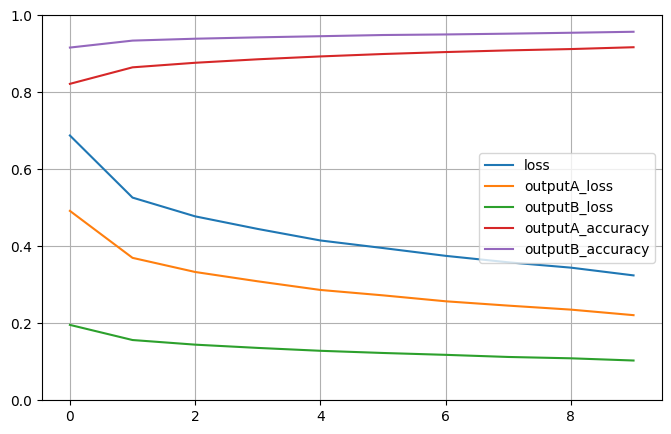

In [51]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

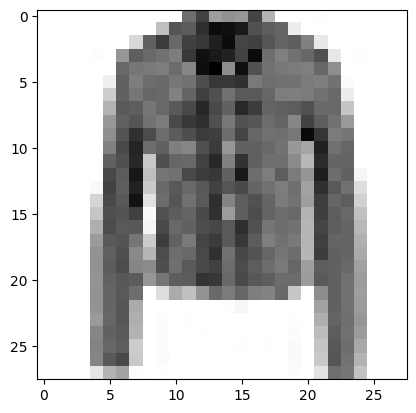

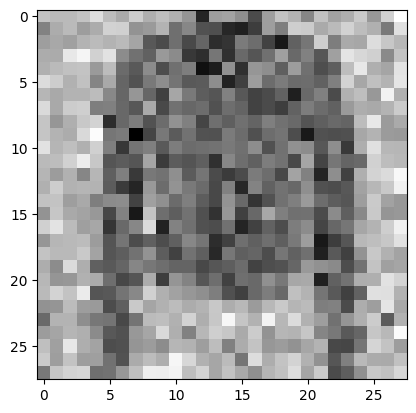

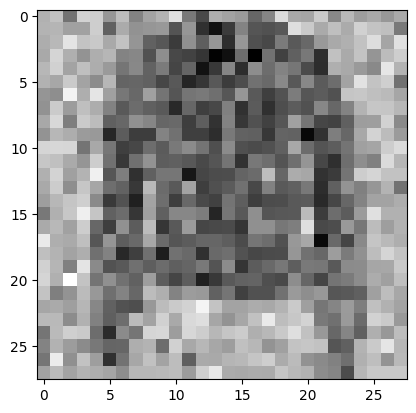

In [50]:
noise=np.random.normal(0.9,0.2, Xtrain[5000,:,:].shape)
import matplotlib.pyplot as plt
import cv2
plt.imshow(Xtest[10,:,:],cmap= 'binary')
plt.show()
plt.imshow(Xtest2[10,:,:],cmap= 'binary')
plt.show()
plt.imshow(Xtest3[10,:,:],cmap= 'binary')
plt.show()